In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import median_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
# warnings.filterwarnings('ignore', category=DeprecationWarning)
#from yellowbrick.regressor import PredictionError
from sklearn.linear_model import Lasso

# Dataset Ground Truth

In [2]:
# Loading the dataset/Import the dataset
video_data = pd.read_csv('../video_quality.csv')

In [3]:
# Read only one part
video_data.head(10)

RESOLUCAO   BITRATE  QP  FPS       PSNR      SSIM  LPIPS  VMAF
0   34560000  153140.4  23   30  37.830948  0.841709    NaN   NaN
1   34560000   70482.2  29   30  34.691950  0.768763    NaN   NaN
2   34560000   48405.0  32   30  33.236920  0.723732    NaN   NaN
3   34560000  116526.4  26   30  36.754460  0.787863    NaN   NaN
4   34560000   72227.2  30   30  34.758755  0.737197    NaN   NaN
5   34560000   50704.8  33   30  33.091034  0.689270    NaN   NaN
6   34560000   72189.4  29   30  35.854400  0.753501    NaN   NaN
7   34560000   41255.6  34   30  33.332720  0.685049    NaN   NaN
8   34560000   33090.2  36   30  32.209446  0.652938    NaN   NaN
9   34560000   54408.0  25   30  36.030660  0.803115    NaN   NaN

# Data Transformation

In [4]:
# Drop columns VMAF and LPIPS
videodata = video_data.drop(['LPIPS', 'VMAF'], axis=1)

In [5]:
videodata.head(5)

RESOLUCAO   BITRATE  QP  FPS       PSNR      SSIM
0   34560000  153140.4  23   30  37.830948  0.841709
1   34560000   70482.2  29   30  34.691950  0.768763
2   34560000   48405.0  32   30  33.236920  0.723732
3   34560000  116526.4  26   30  36.754460  0.787863
4   34560000   72227.2  30   30  34.758755  0.737197

In [6]:
# Check out missing datas
videodata.isnull()

RESOLUCAO  BITRATE     QP    FPS   PSNR   SSIM
0         False    False  False  False  False  False
1         False    False  False  False  False  False
2         False    False  False  False  False  False
3         False    False  False  False  False  False
4         False    False  False  False  False  False
5         False    False  False  False  False  False
6         False    False  False  False  False  False
7         False    False  False  False  False  False
8         False    False  False  False  False  False
9         False    False  False  False  False  False
10        False    False  False  False  False  False
11        False    False  False  False  False  False
12        False    False  False  False  False  False
13        False    False  False  False  False  False
14        False    False  False  False  False  False
15        False    False  False  False  False  False
16        False    False  False  False  False  False
17        False    False  False  False  False  False
18        False    False  False  False  False  False
19        False    False  False  False  False  False
20        False    False  False  False  False  False
21        False    False  False  False  False  False
22        False    False  False  False  False  False
23        False    False  False  False  False  False
24        False    False  False  False  False  False
25        False    False  False  False  False  False
26        False    False  False  False  False  False
27        False    False  False  False  False  False
28        False    False  False  False  False  False
29        False    False  False  False  False  False
...         ...      ...    ...    ...    ...    ...
2610      False    False  False  False  False  False
2611      False    False  False  False  False  False
2612      False    False  False  False  False  False
2613      False    False  False  False  False  False
2614      False    False  False  False  False  False
2615      False    False  False  False  False  False
2616      False    False  False  False  False  False
2617      False    False  False  False  False  False
2618      False    False  False  False  False  False
2619      False    False  False  False  False  False
2620      False    False  False  False  False  False
2621      False    False  False  False  False  False
2622      False    False  False  False  False  False
2623      False    False  False  False  False  False
2624      False    False  False  False  False  False
2625      False    False  False  False  False  False
2626      False    False  False  False  False  False
2627      False    False  False  False  False  False
2628      False    False  False  False  False  False
2629      False    False  False  False  False  False
2630      False    False  False  False  False  False
2631      False    False  False  False  False  False
2632      False    False  False  False  False  False
2633      False    False  False  False  False  False
2634      False    False  False  False  False  False
2635      False    False  False  False  False  False
2636      False    False  False  False  False  False
2637      False    False  False  False  False  False
2638      False    False  False  False  False  False
2639      False    False  False  False  False  False

[2640 rows x 6 columns]

In [7]:
# Returns a boolean indicatiing whether each row is a duplicate or not
videodata.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2610    False
2611    False
2612    False
2613    False
2614    False
2615    False
2616    False
2617    False
2618    False
2619    False
2620    False
2621    False
2622    False
2623    False
2624    False
2625    False
2626    False
2627    False
2628    False
2629    False
2630    False
2631    False
2632    False
2633    False
2634    False
2635    False
2636    False
2637    False
2638    False
2639    False
Length: 2640, dtype: bool

In [ ]:
# change the order of DataFrame column (QP) 
'''
videodata.set_index([videodata.index, 'RESOLUCAO','BITRATE','FPS','PSNR','SSIM', 'QP'], inplace=True)
videodata.head(5)
'''

In [8]:
# get only resolution 640x360
videos640x340 = videodata.iloc[:660]
videos640x340.head(5)

RESOLUCAO   BITRATE  QP  FPS       PSNR      SSIM
0   34560000  153140.4  23   30  37.830948  0.841709
1   34560000   70482.2  29   30  34.691950  0.768763
2   34560000   48405.0  32   30  33.236920  0.723732
3   34560000  116526.4  26   30  36.754460  0.787863
4   34560000   72227.2  30   30  34.758755  0.737197

In [ ]:
# target = videos640x340.set_index(['QP'], drop=True)

In [9]:
# Separating the independent variables from dependent variables
# x = videos640x340.iloc[:,:-1]
# y = videos640x340.iloc[:,5]

X = np.array(videos640x340.drop('QP' , axis=1))
y = np.array(videos640x340['QP'])

In [17]:
# we use MinMaxScaler to scale the data
norm_data = MinMaxScaler()
X = norm_data.fit_transform(X)
y = y.reshape(-1,1)
y = norm_data.fit_transform(y)

In [18]:
# Train Test Split
# ** Split your data into a training set and a testing set.**

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

'''
X_train.sort_index(axis=0, level=None, ascending=True, inplace=True)
X_test.sort_index(axis=0, level=None, ascending=True, inplace=True)

y_test.sort_index(axis=0, level=None, ascending=True, inplace=True)
y_train.sort_index(axis=0, level=None, ascending=True, inplace=True)
'''

'\nX_train.sort_index(axis=0, level=None, ascending=True, inplace=True)\nX_test.sort_index(axis=0, level=None, ascending=True, inplace=True)\n\ny_test.sort_index(axis=0, level=None, ascending=True, inplace=True)\ny_train.sort_index(axis=0, level=None, ascending=True, inplace=True)\n'

# Random Forest Regressor

In [45]:
regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100)
pred = regr.fit(X_train, y_train)
y_pred = pred.predict(X_test)
median_absolute_error(y_test, y_pred)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.06937641905428099

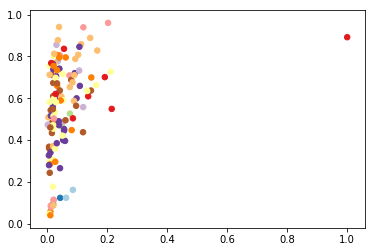

In [47]:
plt.scatter(X_test[:, 1], X_test[:, 4], c=y_pred, s=30, cmap=plt.cm.Paired)

# Support Vector Regression (SVR)

In [38]:
# Regressor
svr = SVR(kernel='rbf', gamma=0.001, C=1000, epsilon=.1, degree=8)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

mae = median_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Absolute Error: 0.07521842458231842
Mean Squared Error: 0.012235037801194759


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


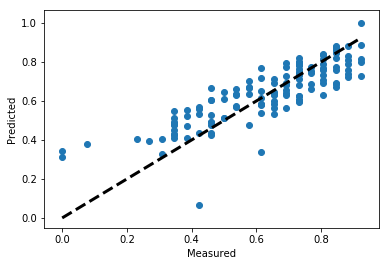

In [39]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [40]:
# Black broken line is the predicted values.

In [50]:
# plt.scatter(X_test[:, 1], X_test[:, 3], c=y_pred, s=30, cmap=plt.cm.Paired)

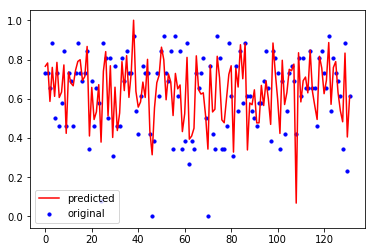

In [42]:
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=10, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
# ## Model Evaluation
# 
# **Now get predictions from the model and create a confusion matrix and a classification report.**
# pred = svm.predict(X_test)
# print(confusion_matrix(y_test,pred))

# Support Vector Machine (SVM) / Classification